In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import datetime

import sys
from os.path import dirname, abspath
import os
sys.path.append(dirname(dirname(dirname(abspath('__file__')))))

from utils.eval_testing import Testing
from utils.read_answers import ReadAnswers
from utils.check_performance import checkPerformance

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [78]:
%pprint

Pretty printing has been turned OFF


In [2]:
## Input the filenames and parameters:
filename = 'AmsData_lage_measurements_all.pkl'
original_indices = 'orig_x.npy'
full_indices = 'full_time_index.npy'
filename_answers = 'hoge_segm_lines_31052020.txt'#'answers_Ada_02_lage.txt' # 'answers_Ada_01.txt' # 
interpolation_method = 'linear'

In [4]:
## Create variables with directories to external files:
directory = os.path.join(dirname(dirname(os.getcwd())), 'data_files/')
file_data = os.path.join(directory, filename)
file_full_indices = os.path.join(directory, full_indices)
file_orig_indices = os.path.join(directory, original_indices)
file_answers = os.path.join(directory, filename_answers)

In [5]:
## Import the measurements:
data_imported = pd.read_pickle(file_data)
mydata = data_imported[interpolation_method].copy()

## Load and calculate x-axis index:
orig_x = np.load(file_orig_indices)
full_x = np.load(file_full_indices) 
indices = [int(i*365.25/11) for i in orig_x]

## Load the answers (ground truth):
answers_all = ReadAnswers(file_answers)
ans = pd.DataFrame(answers_all['segm_lines'], index = answers_all.index)
ans.columns = ['segm']

for i, vals in enumerate(ans.segm):
    ans.segm.loc[ans.index[i]] = [indices[j] for j in vals]
    
indices_reverse = []
for i in range(297):
    if i in indices:
        indices_reverse.append(i)
    else:
        indices_reverse.append(indices_reverse[i-1])

In [326]:
with open('BFAST_results/BFAST_AH_linear_corr_none_only_ans_0706.txt', 'r') as file:
    f = file.readlines()
        
bfast_ans = []
for line in f:
    print(line)
    tmp = line.rstrip().split(' ')
    print(tmp)
    print([int(i) for i in tmp[2:]])
    tmp2 = [int(i) for i in tmp[2:]]
    tmp3 = [indices_reverse[x] for x in tmp2]
    if 0 in tmp3: 
        tmp3.remove(0) 
    print(tmp3)
    print('-------------')
    bfast_ans.append(tmp3)
    
        

783 "1" 0

['783', '"1"', '0']
[0]
[]
-------------
1056 "1" 58

['1056', '"1"', '58']
[58]
[58]
-------------
1281 "1" 116 160

['1281', '"1"', '116', '160']
[116, 160]
[115, 160]
-------------
1306 "1" 133

['1306', '"1"', '133']
[133]
[133]
-------------
1373 "1" 52

['1373', '"1"', '52']
[52]
[52]
-------------
1398 "1" 213

['1398', '"1"', '213']
[213]
[213]
-------------
1419 "1" 71 144 241

['1419', '"1"', '71', '144', '241']
[71, 144, 241]
[71, 143, 241]
-------------
1639 "1" 0

['1639', '"1"', '0']
[0]
[]
-------------
1650 "1" 0

['1650', '"1"', '0']
[0]
[]
-------------
1719 "1" 52

['1719', '"1"', '52']
[52]
[52]
-------------
1848 "1" 90

['1848', '"1"', '90']
[90]
[90]
-------------
2100 "1" 96 177

['2100', '"1"', '96', '177']
[96, 177]
[95, 177]
-------------
2104 "1" 115 159 214

['2104', '"1"', '115', '159', '214']
[115, 159, 214]
[115, 159, 214]
-------------
2360 "1" 97

['2360', '"1"', '97']
[97]
[97]
-------------
2745 "1" 77 121

['2745', '"1"', '77', '121']
[77

In [327]:
# methods = ['BOCD', 'BFAST', 'GFLseg', 'PLR sw', 'PLR bu', 'PLR td']
# answers = [bocd_all, bfast_all, gflseg_all, plr_sw, plr_bu, plr_td]

methods = ['BFAST']
answers = [bfast_ans]

recalls = {}
precisions = {}
for m in methods:
    recalls[m] = []
    precisions[m] = []
    
for i, m in enumerate(methods):
    for l in range(100):
        print(l, answers[i][l], "vs", ans.segm.iloc[l])
        r, p = checkPerformance(answers[i][l], ans.segm.iloc[l], tolerance = 5)
        recalls[m].append(r)
        precisions[m].append(p)

0 [] vs [60]
1 [58] vs []
2 [115, 160] vs [130]
3 [133] vs [123]
4 [52] vs [52]
5 [213] vs []
6 [71, 143, 241] vs [39]
7 [] vs []
8 [] vs []
9 [52] vs [52]
10 [90] vs [88]
11 [95, 177] vs [176]
12 [115, 159, 214] vs [210, 113, 24]
13 [97] vs []
14 [77, 119] vs [53]
15 [75, 175, 219] vs [168, 39, 199, 97]
16 [130] vs [6]
17 [139, 213] vs [99]
18 [] vs [97]
19 [123] vs []
20 [163, 251] vs [194, 104]
21 [99, 187] vs [97]
22 [64, 123] vs [123, 39]
23 [] vs [119]
24 [67, 251] vs [65]
25 [] vs [21]
26 [186] vs [185]
27 [47, 119, 199] vs [8, 2, 199, 46]
28 [47, 214] vs []
29 [80, 150] vs []
30 [95, 150] vs []
31 [150, 218] vs []
32 [159] vs []
33 [] vs [113]
34 [51, 123] vs [104]
35 [141] vs [130]
36 [95] vs [94]
37 [] vs [104]
38 [150] vs [119]
39 [68, 111] vs [104]
40 [77] vs [99, 199, 53]
41 [53, 101, 217] vs [99, 53, 214]
42 [70, 130, 224] vs [130, 28, 150]
43 [104] vs []
44 [] vs []
45 [246] vs [245]
46 [115] vs [123]
47 [] vs [104, 63]
48 [97, 150] vs [95, 76]
49 [] vs []
50 [75, 205] v

In [328]:
for m in methods:
    print(m)
    print('recall:', np.nanmean(recalls[m]))
    print('precision:',np.nanmean(precisions[m]), '\n')


BFAST
recall: 0.4301801801801802
precision: 0.30120481927710846 



In [215]:
list(ans.inde)

[14, 135, 137, 157, 243, 244, 245, 310, 372, 535, 565, 868, 869, 870, 871, 873, 874, 875, 877, 971, 1051, 1151, 1322, 1451, 1651, 1736, 1888, 1910, 2235, 2271, 2314, 2379, 2621, 2737, 2828, 2888, 2996, 3049, 3054, 3197, 3301, 3362, 3411, 3517, 3559, 3619, 3751, 3877, 3900, 3951, 3957, 3981, 3988, 4038, 4081, 4085, 4150, 4153, 4205, 4365, 4521, 4768, 4786, 4934, 5239, 5240, 5309, 5321, 5381, 5430, 5508, 5621, 5647, 5648, 5675, 5676, 5677, 5678, 5826, 5835, 5928, 5978, 6030, 6106, 6331, 6344, 6417, 6421, 6551, 6877, 7015, 7243, 7246, 7349, 7530, 7731, 7846, 7870, 7963, 8122]

<IPython.core.display.Javascript object>


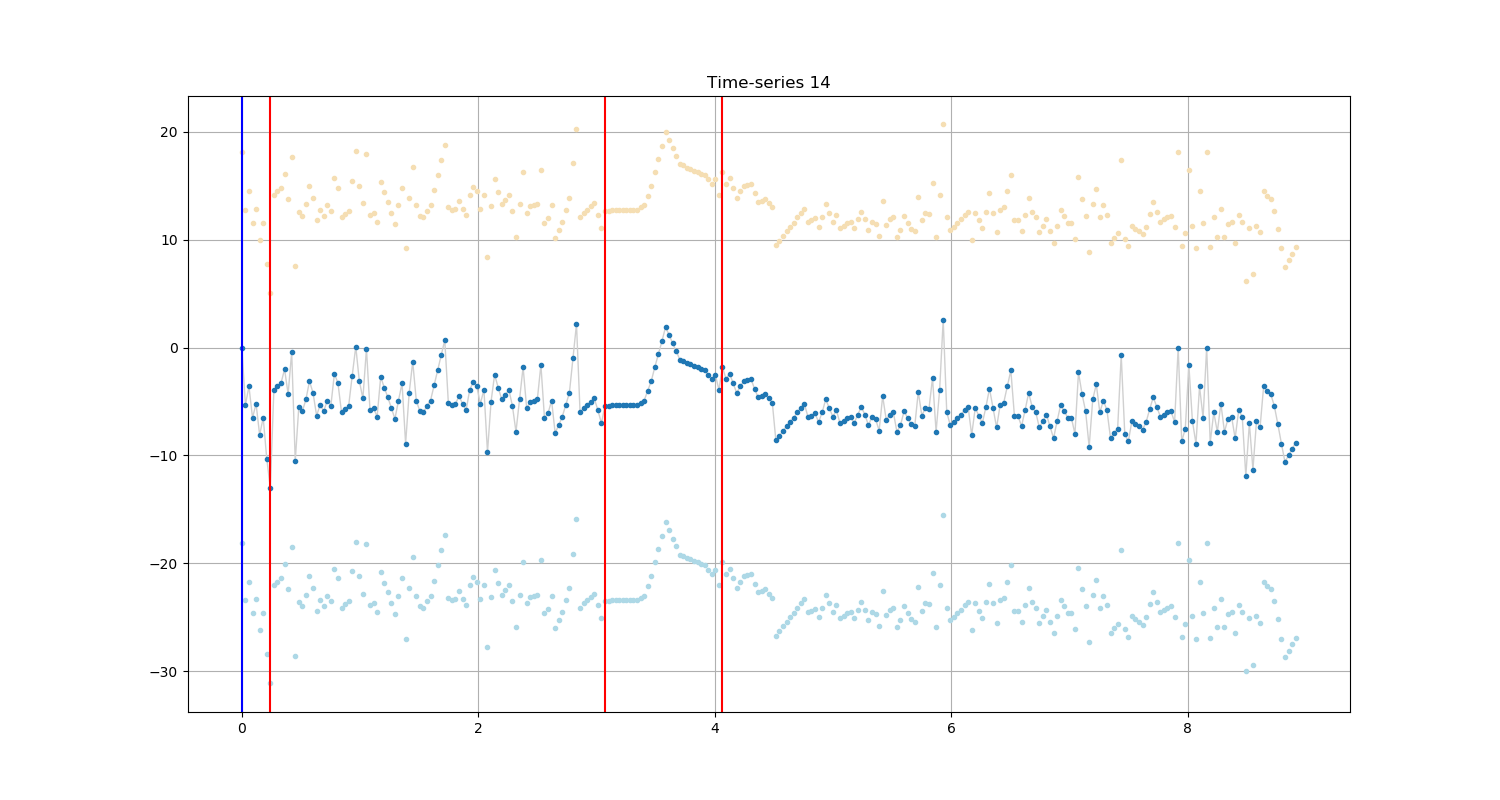

<IPython.core.display.Javascript object>


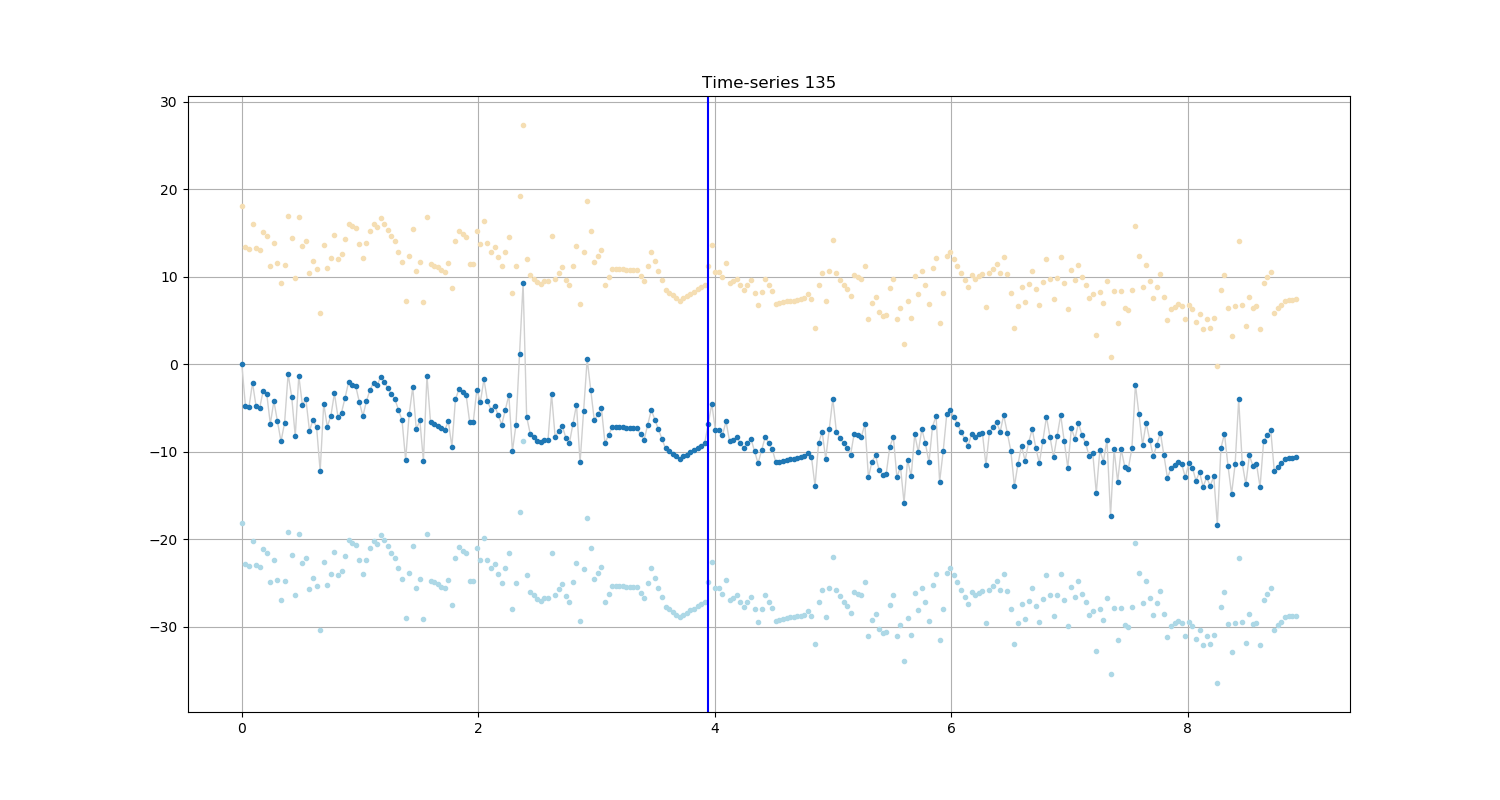

<IPython.core.display.Javascript object>


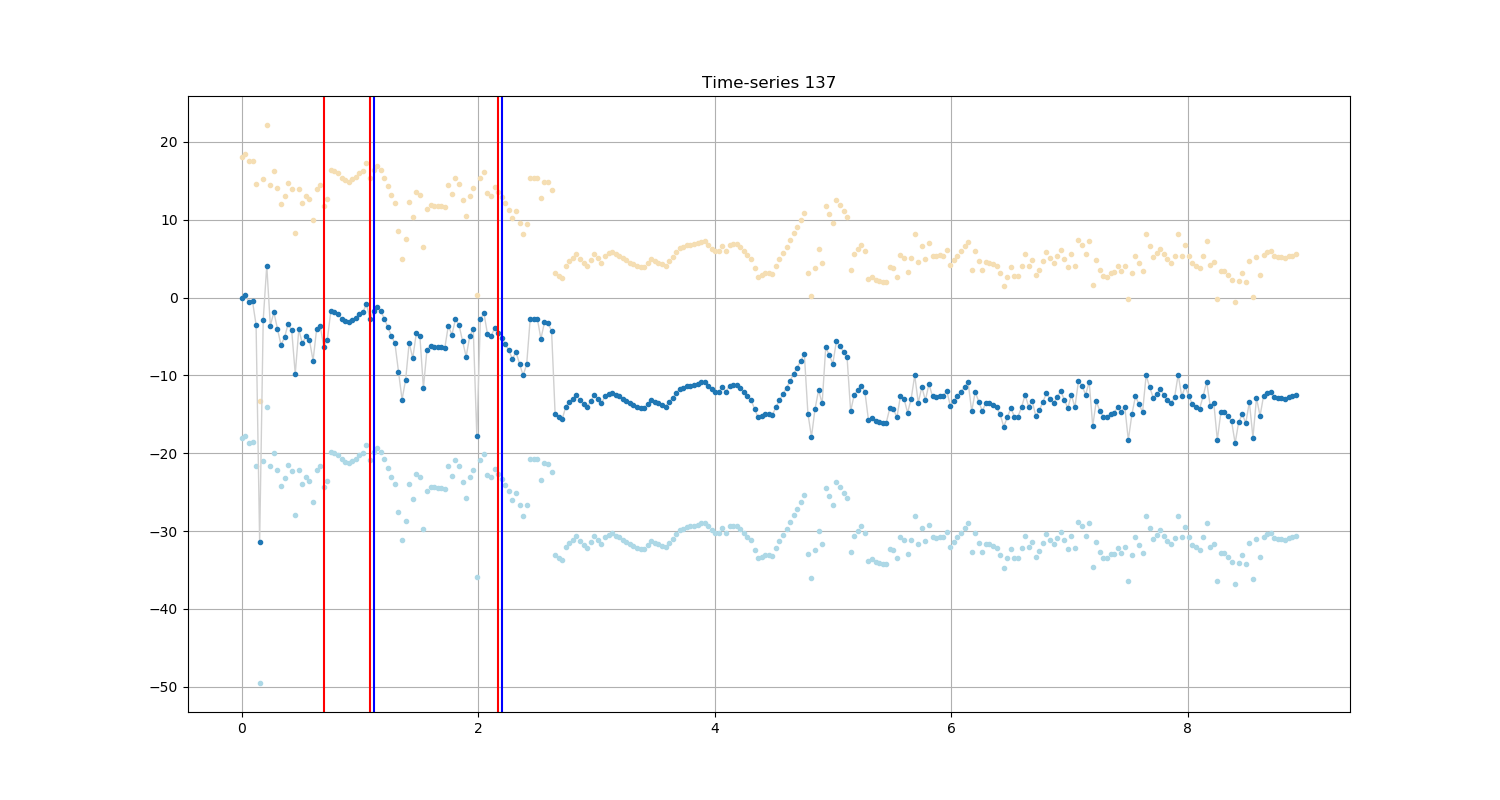

<IPython.core.display.Javascript object>


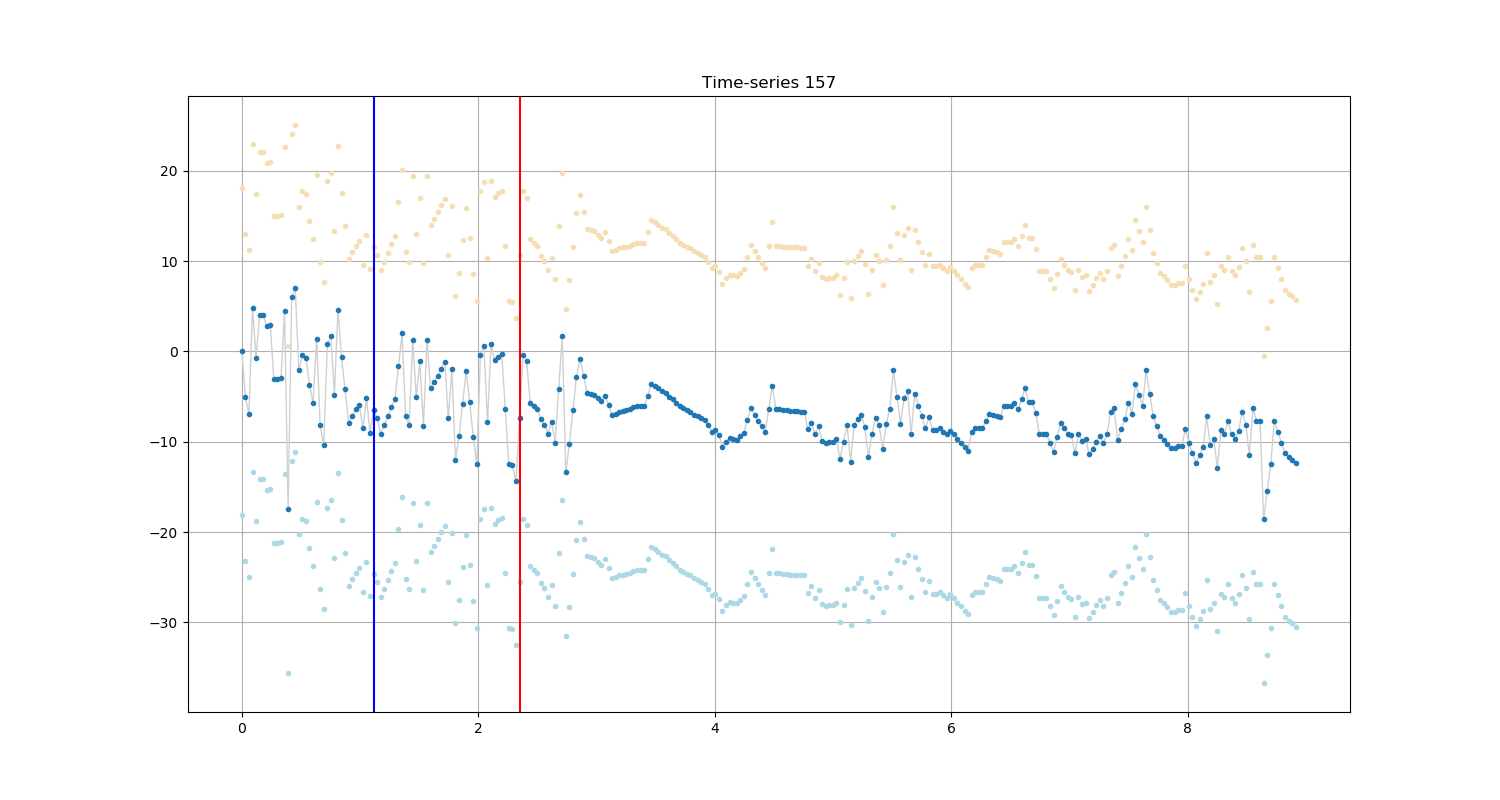

<IPython.core.display.Javascript object>


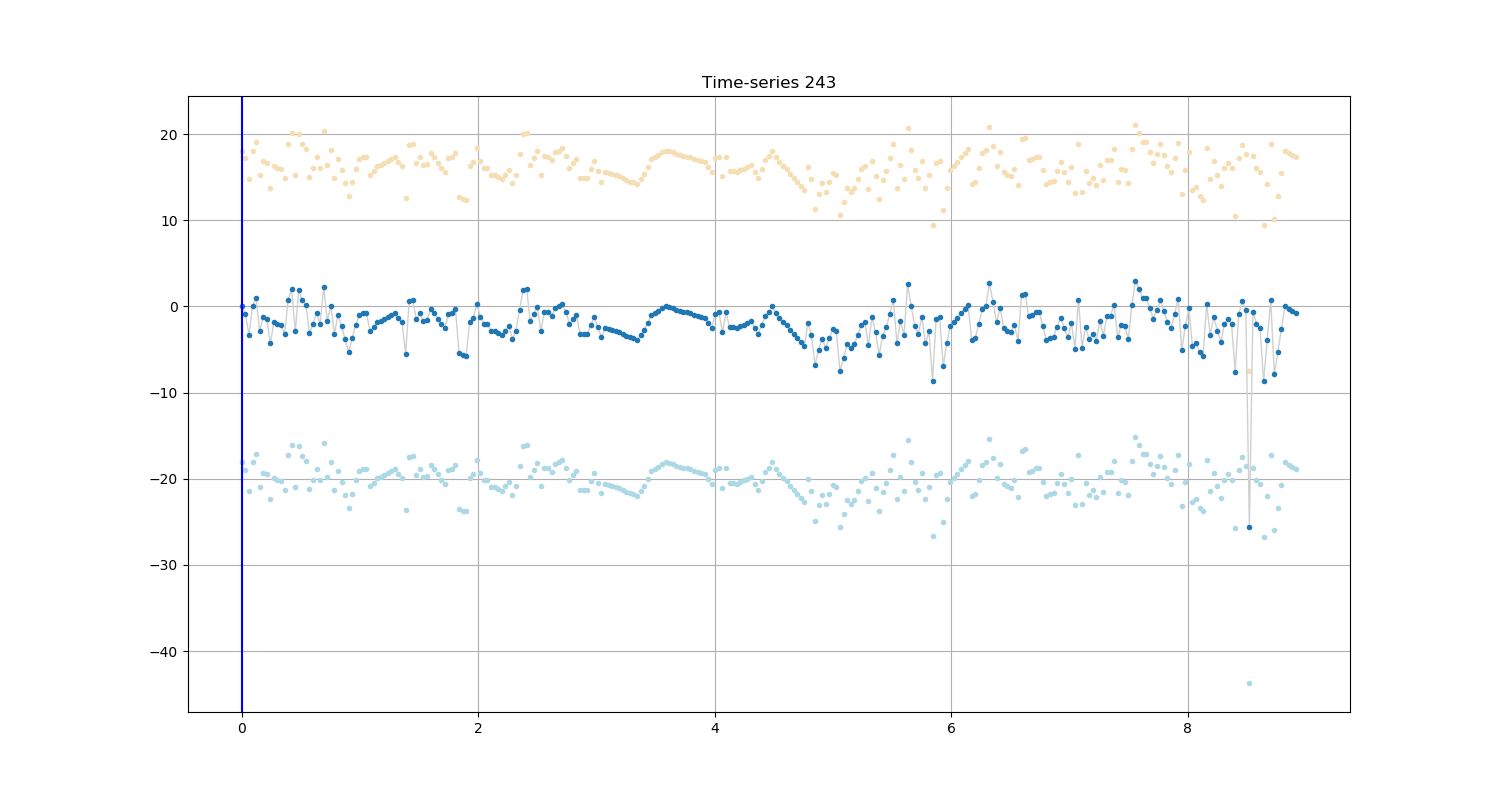

<IPython.core.display.Javascript object>


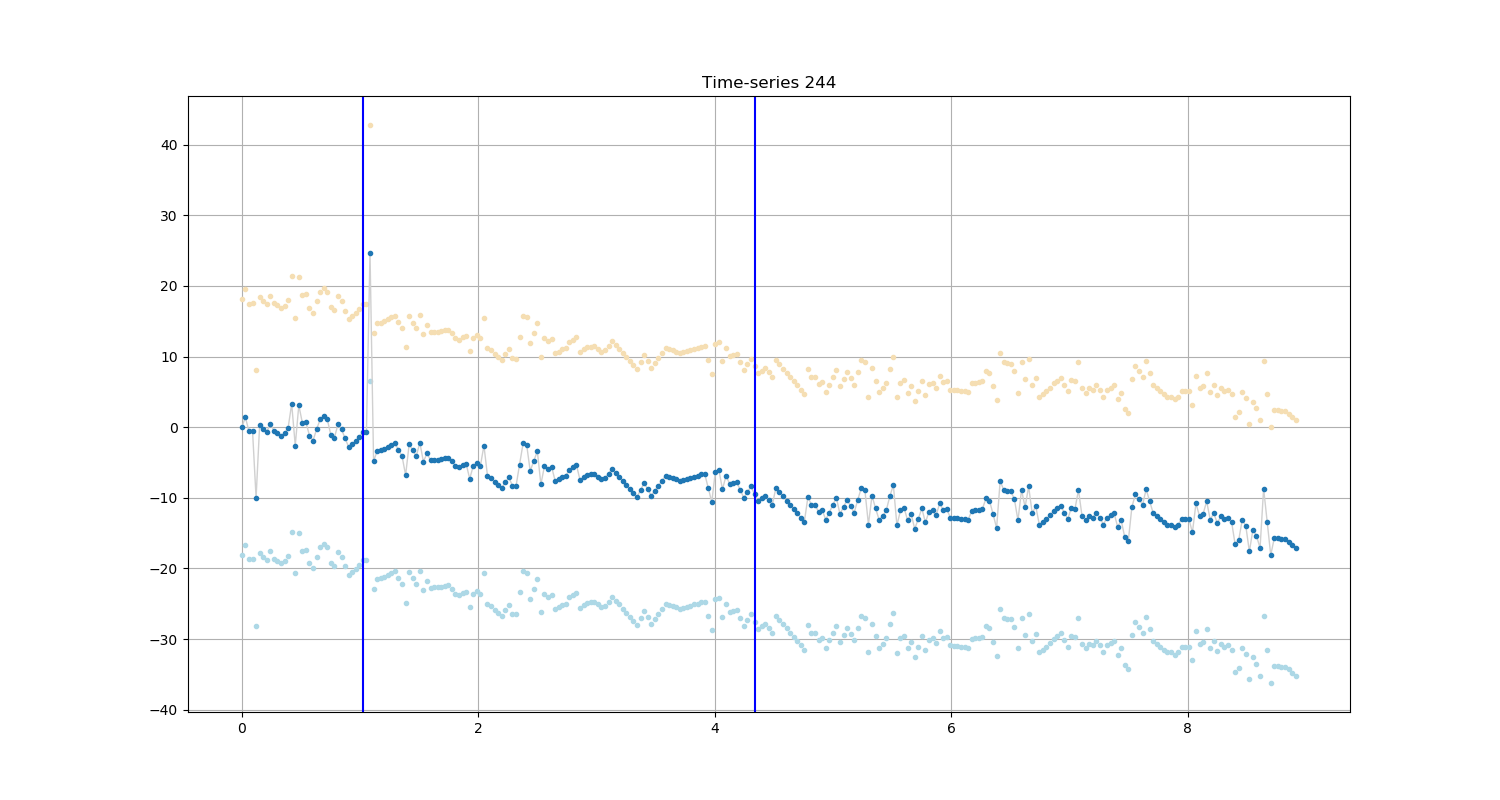

<IPython.core.display.Javascript object>


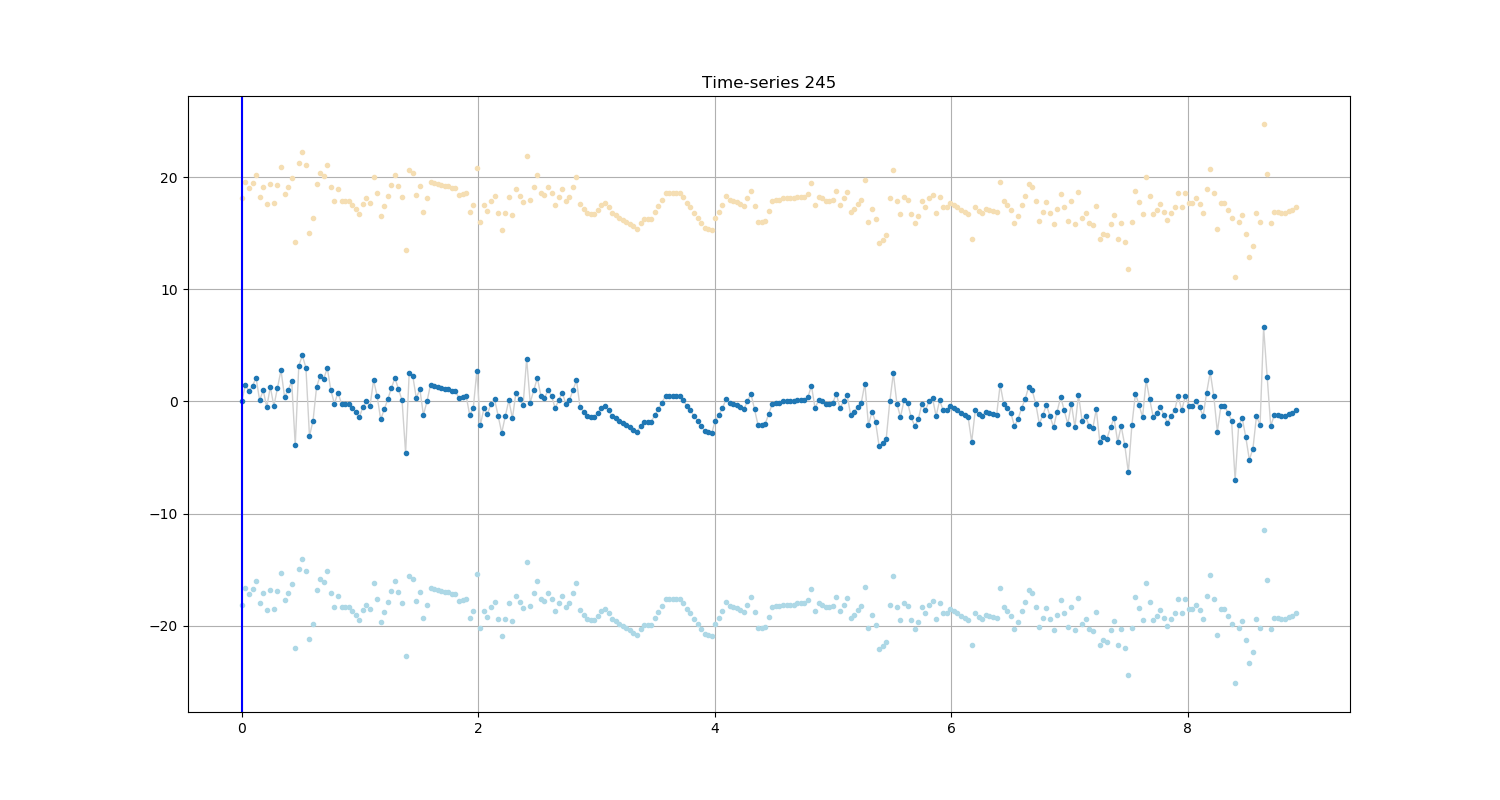

<IPython.core.display.Javascript object>


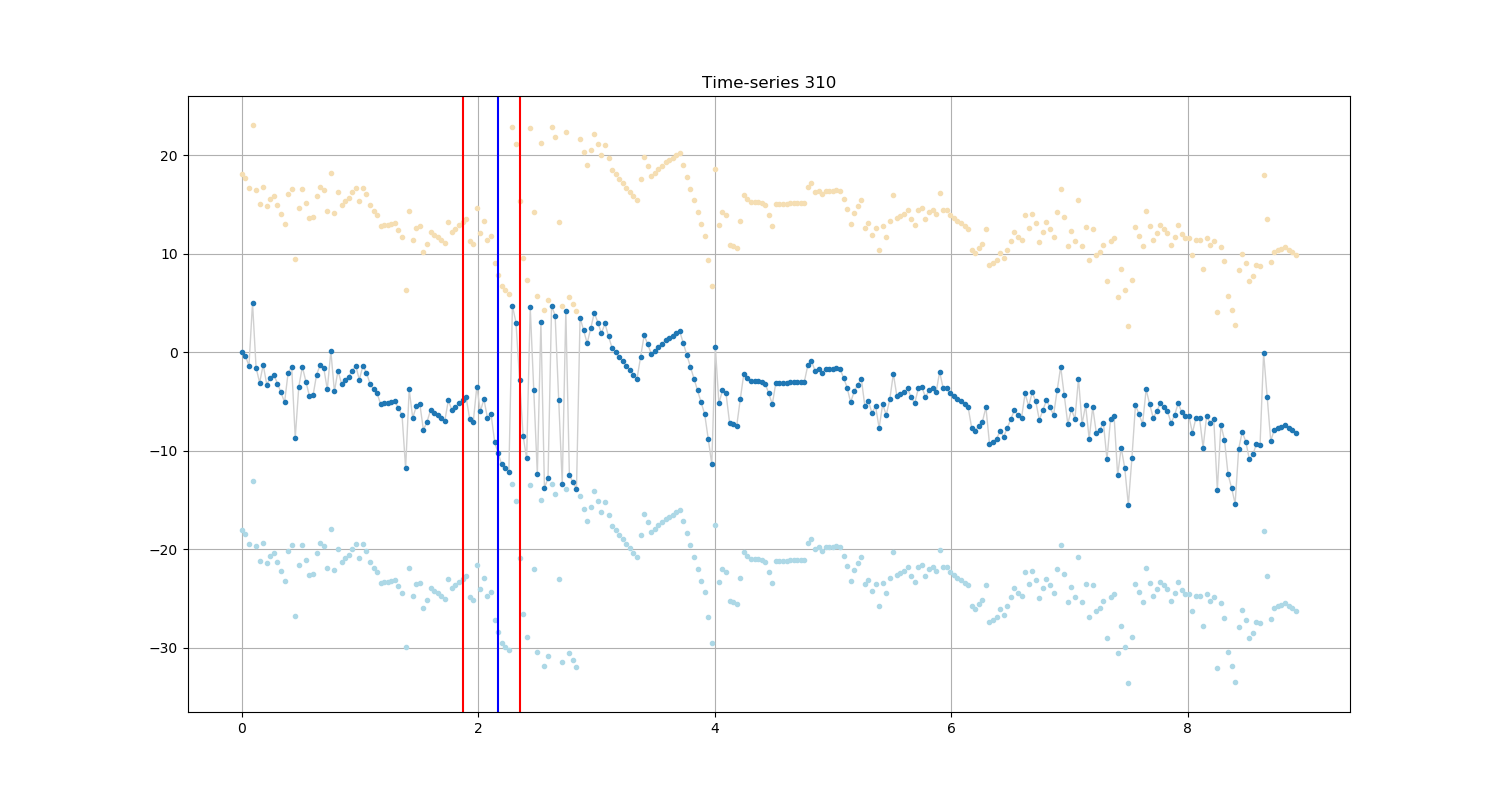

<IPython.core.display.Javascript object>


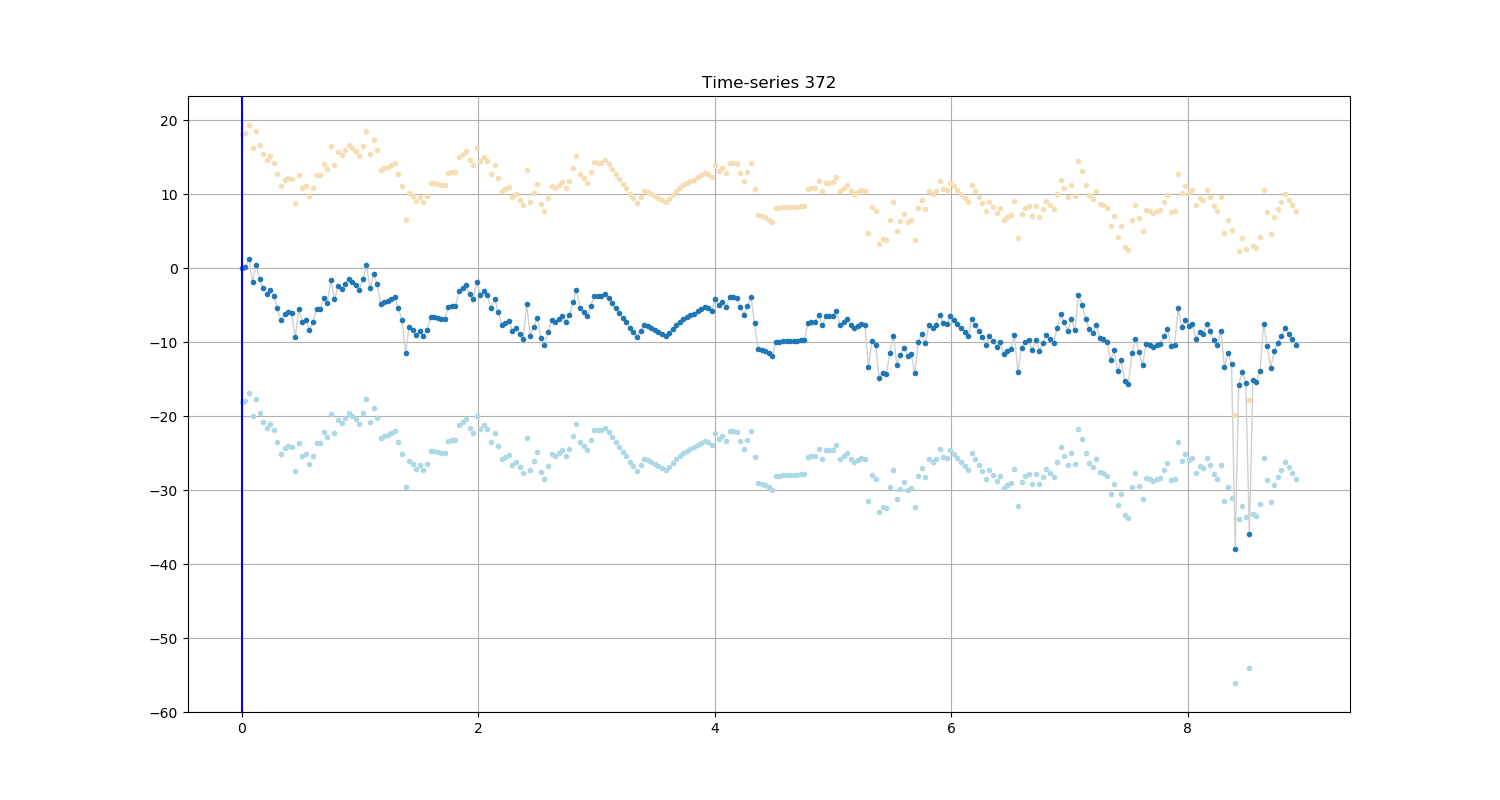

<IPython.core.display.Javascript object>


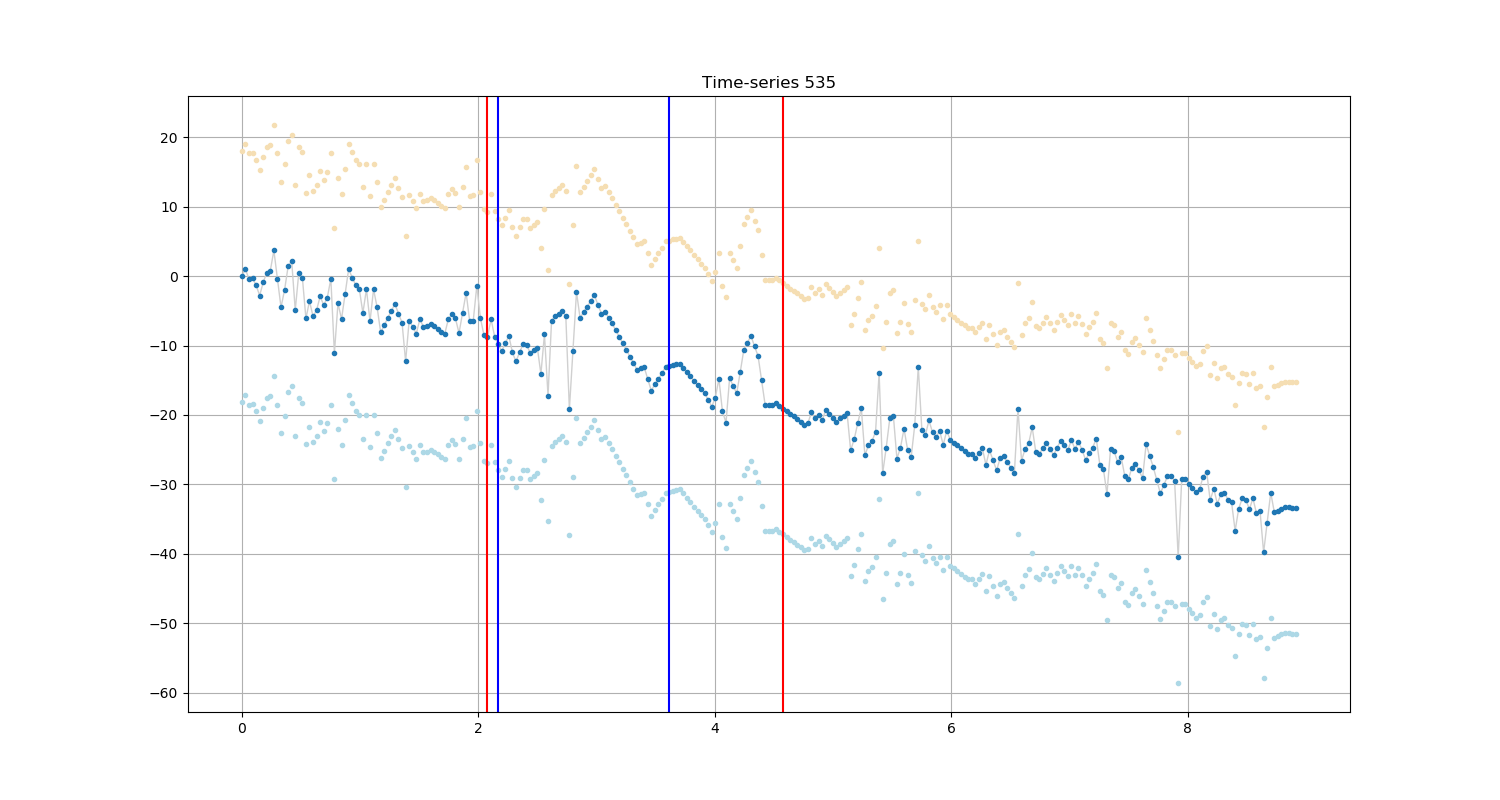

<IPython.core.display.Javascript object>


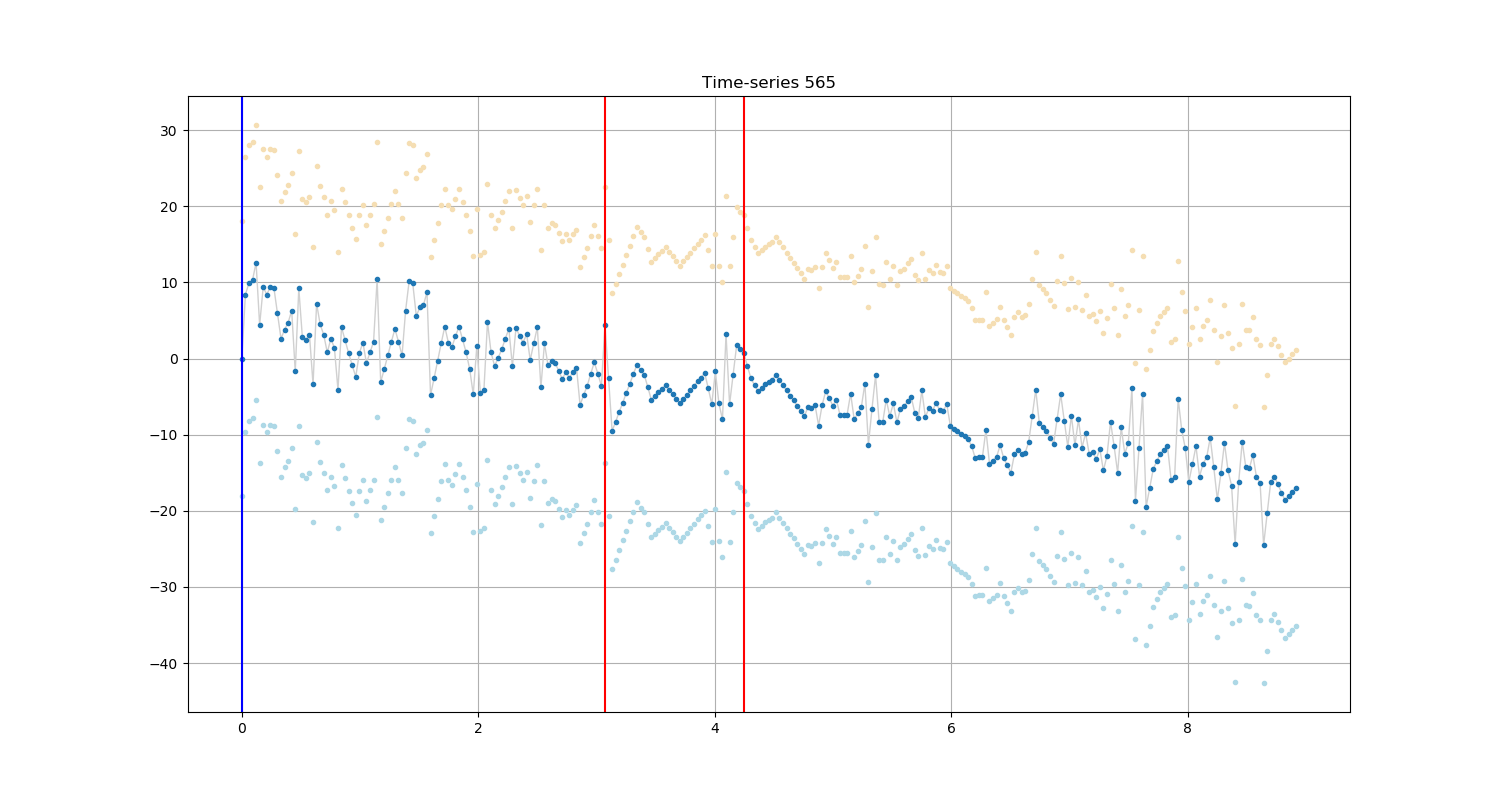

<IPython.core.display.Javascript object>


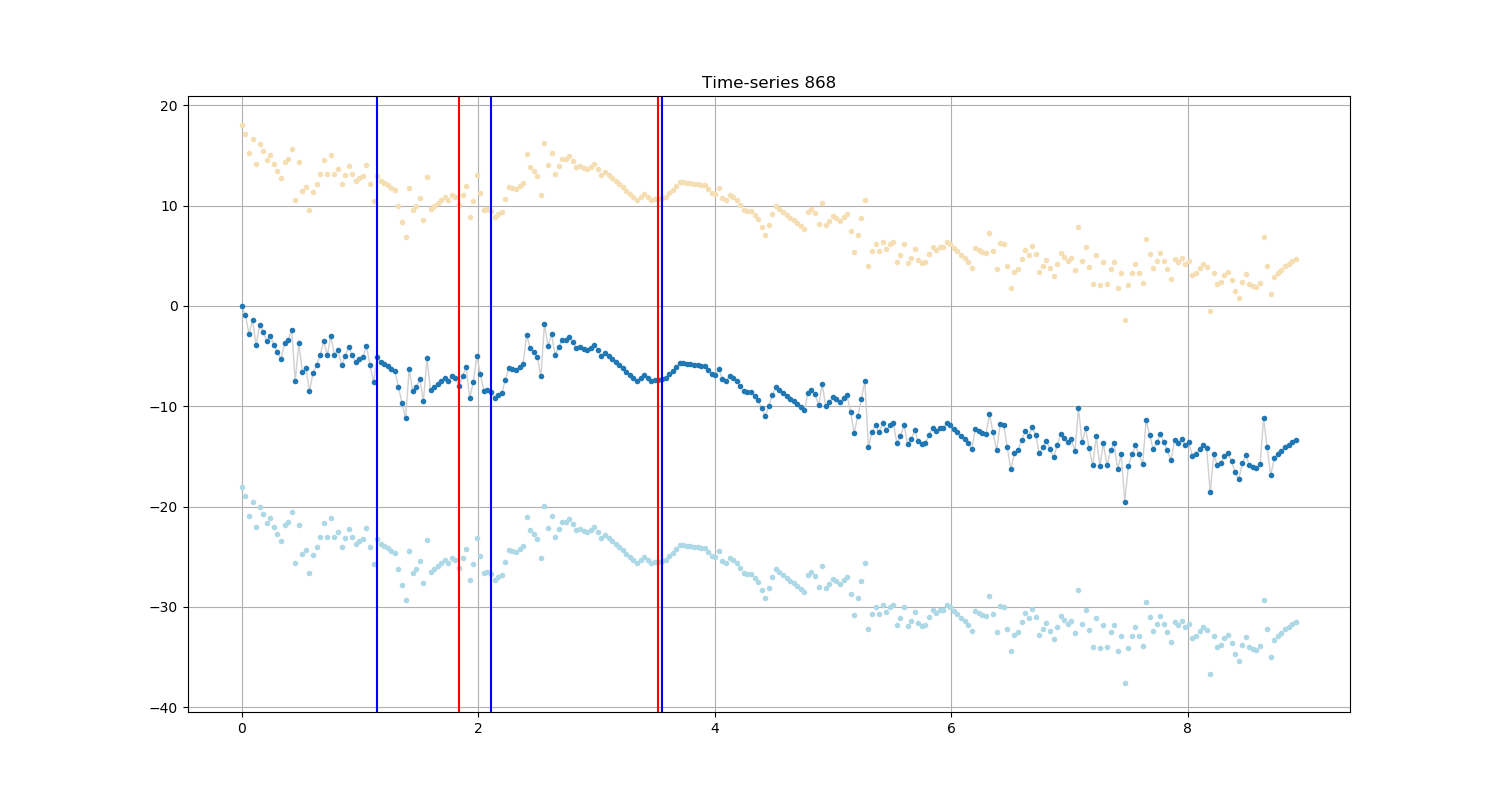

In [217]:
%matplotlib notebook
for i in [14, 135, 137, 157, 243, 244, 245, 310, 372, 535, 565, 868]: #range(len(ans)):
    ts_num = i #ans.index[i]
    plt.figure(figsize=(15,8))
    ax = plt.gca()
    ax.grid(True)
#     ax.grid(color="whitesmoke")
    ax.set_axisbelow(True)
    ax.plot(full_x, mydata.iloc[ts_num], '-o', markersize=3, linewidth=1, color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0')
    ax.scatter(full_x, mydata.iloc[ts_num].T + 18.1, s=9,
                c="wheat")
    ax.scatter(full_x, mydata.iloc[ts_num].T - 18.1, s=9,
                c="lightblue")
    for j in ans.segm.loc[i]:
        plt.axvline(full_x[j], color='red')
    for k in answers[0][list(ans.index).index(i)]:
        plt.axvline(full_x[k], color='blue')
    plt.title('Time-series '+ str(ts_num))
    plt.show()